# LOAD MODULES

In [1]:
# Loading modules....
# import numpy and matplotlib
import numpy as NP
import matplotlib.pyplot as PP

# import python module for pencile code
import pencil as pc

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc
$ conda install -c plotly plotly-orca psutil requests


In [2]:
# set properties of figure (just for the beautification, this is not mandatory)
PP.rc('figure',figsize=(8,6))
PP.rc('font',size=20)
PP.rc('xtick.major',size=8,width=2)
PP.rc('xtick.minor',visible=True,size=4,width=1)
PP.rc('ytick.major',size=8,width=2)
PP.rc('ytick.minor',visible=True,size=4,width=1)

# READ TIME SERIES

In [3]:
# read time series
ts = pc.read.ts()

Read 35 lines.


In [4]:
# All the time series variables are now loaded in to ts
# find out what is there in ts?
print(dir(ts))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ekin', 'epsK', 'ethm', 'it', 'keys', 'read', 'rhom', 'ssm', 't', 'ugradpm', 'urms']


# Plot quantities, e.g., rms velocity, as a funtion of time

Text(0, 0.5, '$u_{\\rm rms}$')

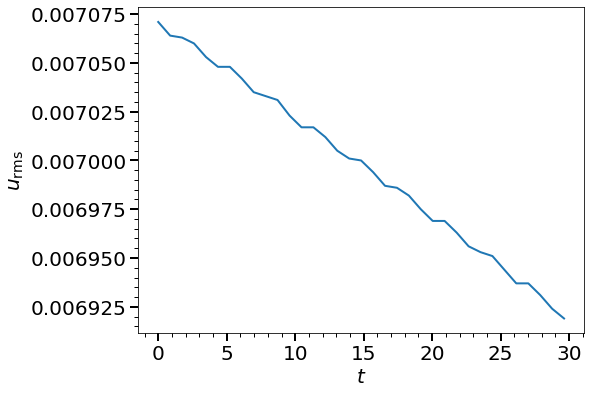

In [4]:
# plot urms vs time
PP.plot(ts.t,ts.urms,'-',linewidth=2)
PP.xlabel(r'$t$')
PP.ylabel(r'$u_{\rm rms}$')
# if you want to save the figure in a file .png, .eps, etc uncomment the following line
#PP.savefig('urmsVst.eps')

Text(0, 0.5, '$\\varepsilon_{\\rm K}$')

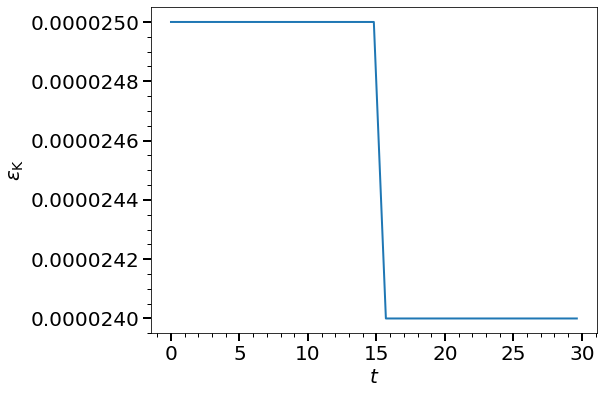

In [5]:
PP.plot(ts.t,ts.ekin,'-',linewidth=2)
PP.xlabel(r'$t$')
PP.ylabel(r'$\varepsilon_{\rm K}$')

Text(0, 0.5, '$\\varepsilon_{\\rm thm}$')

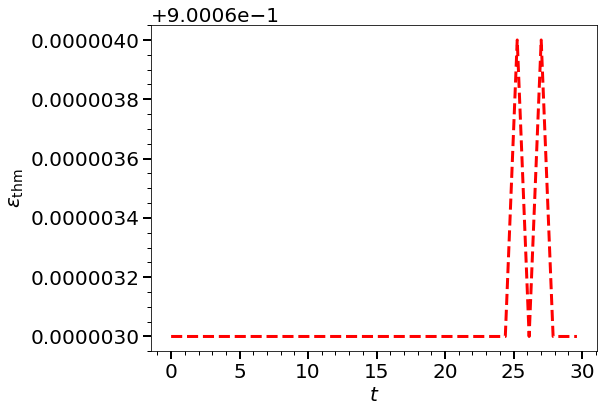

In [6]:
PP.plot(ts.t,ts.ethm,'--r',linewidth=3)
PP.xlabel(r'$t$')
PP.ylabel(r'$\varepsilon_{\rm thm}$')

# READ SNAPSHOTS (VAR files) AT SPECIFIC TIMES

In [6]:
# uncomment the following to learn about this procedure
#pc.read.var?

In [7]:
# read last snapshot, uncomment various print statements to know more
f = pc.read.var(datadir='data',var_file='var.dat',trimall=True)

#print(dir(f)) # contents of f
#print(f.t) # time of the snapshot/VAR file
#print(NP.shape(f.ux)) # x-component of the velocity

nx=len(f.x)
x=NP.reshape(f.x,nx)
ux=NP.reshape(f.ux,nx)

#print(NP.shape(x))
#print(NP.shape(ux))

Text(0, 0.5, '$u_x$')

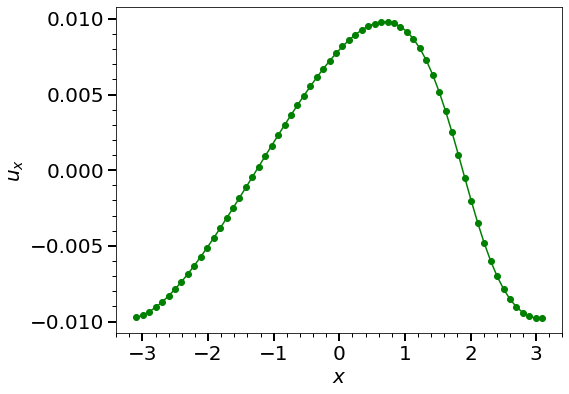

In [8]:
PP.plot(x,ux,'-og')
PP.xlabel(r'$x$')
PP.ylabel(r'$u_x$')

Text(0, 0.5, '$u_x$')

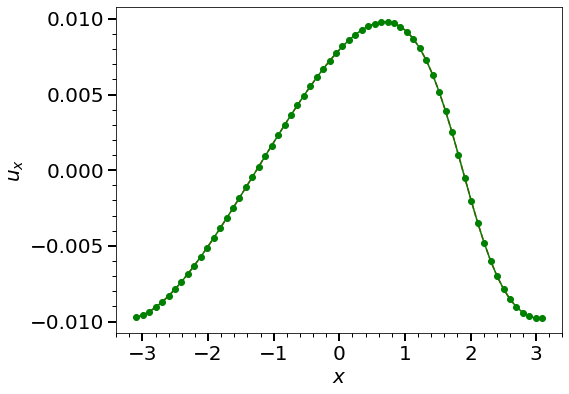

In [9]:
# read arbitrary snapshot, uncomment various print statements to know more
# check, e.g., data/proc0/VAR[N] in your run directory, where [N] is 0,1,2 etc
# VAR1, VAR2 ... are different snapshots at different times, larger N at later times 

f4 = pc.read.var(datadir='data',var_file='VAR4',trimall=True)
#print(f4.t)

uxV4=NP.reshape(f.ux,nx)
PP.plot(x,uxV4,'--r') # ux from an earlier time given by f4.t
PP.plot(x,ux,'-og') # ux from the latest time
PP.xlabel(r'$x$')
PP.ylabel(r'$u_x$')

# READ VIDEO FILES/SLICES

In [10]:
# uncomment the following to learn about this procedure
#pc.read.slices?

In [10]:
s = pc.read.slices(field='uu1',proc=0) # uu1 for ux, the x-component of velocity

#print(dir(s))
size = NP.shape(s.xy.uu1)
nt=size[0]

#print(size)
#print(ntt)

t_sl=s.t.reshape(nt)
t_x_array_ux=s.xy.uu1.reshape(nt,nx)

Text(0, 0.5, '$t$')

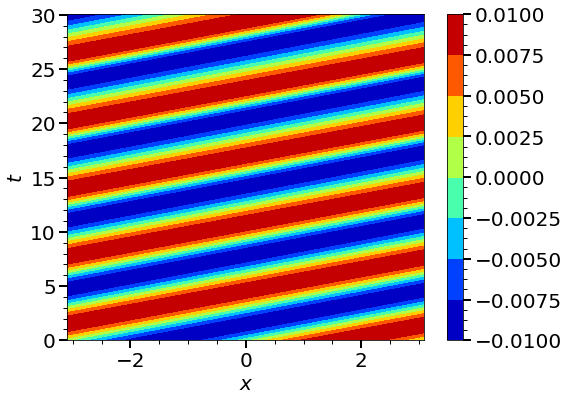

In [11]:
# contour plot of ux in x-t plane

PP.contourf(x,t_sl,t_x_array_ux,cmap='jet')
PP.colorbar()
PP.xlabel(r'$x$')
PP.ylabel(r'$t$')

In [13]:
NP.shape(t_x_array_ux)

(116, 64)

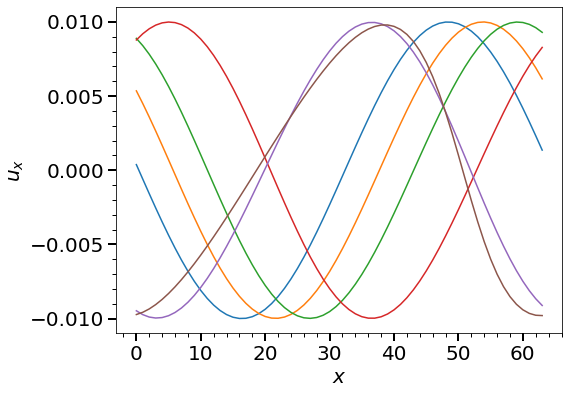

In [12]:
it=[0,5,10,20,50,nt-1] # choose a few times to show the profile evolution
for i in it:
    #print(i)
    PP.plot(t_x_array_ux[i,:])
    PP.xlabel(r'$x$')
    PP.ylabel(r'$u_x$')

# READ THE RUN PARAMETERS

In [17]:
#pc.read.param?

In [18]:
# read start and run parameters
ddir = 'data'
para = pc.read.param(datadir=ddir, quiet=True)

In [19]:
# what are the box lengths in all three directions?
print(para.lxyz)

[40.0, 1.0, 1.0]


In [20]:
# The value of the viscosity
print(para.nu)

0.400000006
